### Visualizing Earnings Based on College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

*  `Rank` - Rank by median earnings (the dataset is ordered by this column).
*  `Major_code` - Major code.
*  `Major` - Major description.
*  `Major_category` - Category of major.
*  `Sample_size` - Sample size (unweighted) of full-time.
*  `Men` - Male graduates.
*  `Women` - Female graduates.
*  `ShareWomen` - Women as share of total.
*  `Employed` - Number employed.
*  `Median` - Median salary of full-time, year-round workers.
*  `Full_time` - Number employed 35 hours or more.
*  `Part_time` - Number employed less than 35 hours.


Using visualizations, we can start to explore questions from the dataset like:

* Do students in more popular majors make more money?
    * Using scatter plots
* How many majors are predominantly male? Predominantly female?
    * Using histograms
* Which category of majors have the most students?
    * Using bar plots


In [84]:
# Import the libraries

import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [85]:
# Read the datas

recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [86]:
# Getting a feel of the datas

print(recent_grads.head())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [87]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [88]:
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

### Dropping the missing values

In [89]:
# Number of raws
# recents_grads.shape[1] will return the number of columns
raw_data_count = recent_grads.shape[0]
# test2 = recents_grads.shape[1]
# Number of rows for each column  
count_per_columns = recent_grads.count()
print(raw_data_count)

173


In [90]:
# We drop the rows with missing values 
recent_grads = recent_grads.dropna()

In [91]:
# Assign the cleaned version of the DF to a new var for comparison
cleaned_data_count = recent_grads.shape[0]

count_per_columns2 = recent_grads.count()
cleaned_data_count

172

When we compare cleaned_data_count and raw_data_count, we notice that only one row contained missing values and was dropped.

### Plotting 101

Most of the plotting functionality in pandas is contained within the [DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the **`kind`** parameter to specify the type of plot we want. We use **`x`** and **`y`** to specify the data we want on each axis. You can read about the different parameters in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Example: 
```python
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
```

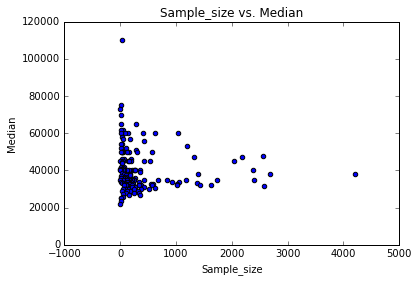

In [92]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

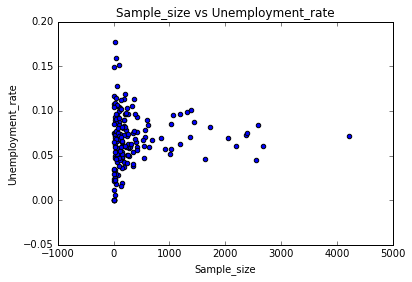

In [93]:
ax1 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax1.set_title('Sample_size vs Unemployment_rate')

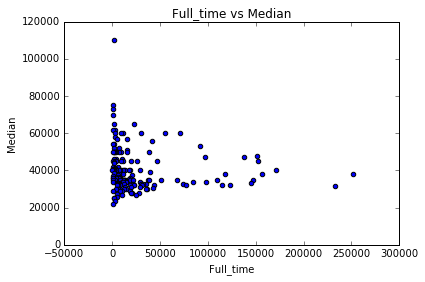

In [94]:
ax2 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax2.set_title('Full_time vs Median')

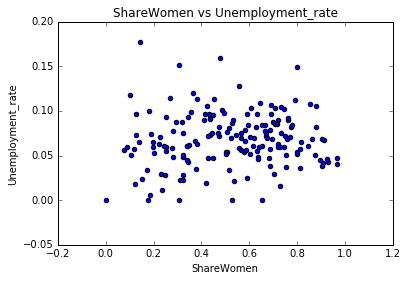

In [95]:
ax3 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax3.set_title('ShareWomen vs Unemployment_rate')

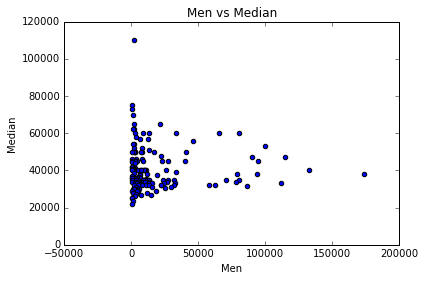

In [96]:
ax4 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax4.set_title('Men vs Median')

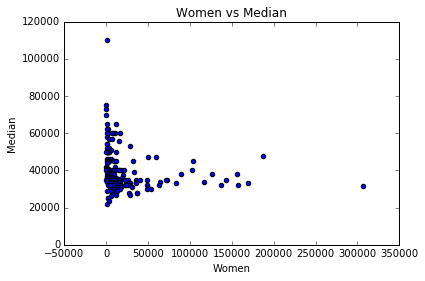

In [81]:
ax5 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax5.set_title('Women vs Median')

### Generating histograms

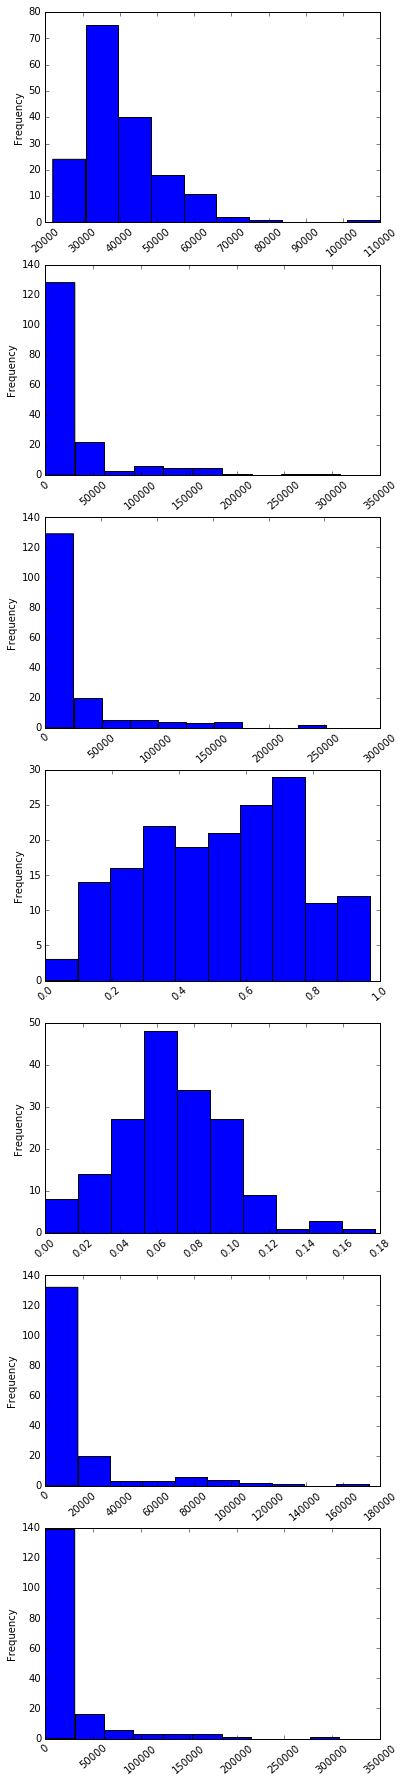

In [111]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(6,40))
for r in range(1,8):
    ax = fig.add_subplot(9,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

### Scatter matric plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc358ed7f28>,
      dtype=object)

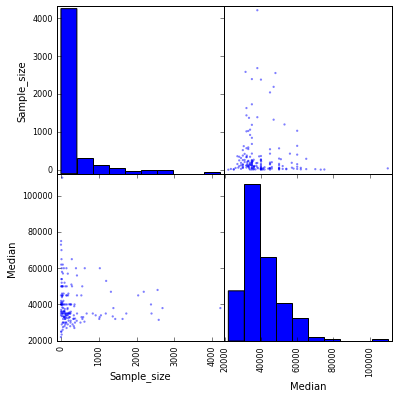

In [112]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc352b665f8>,
      dtype=object)

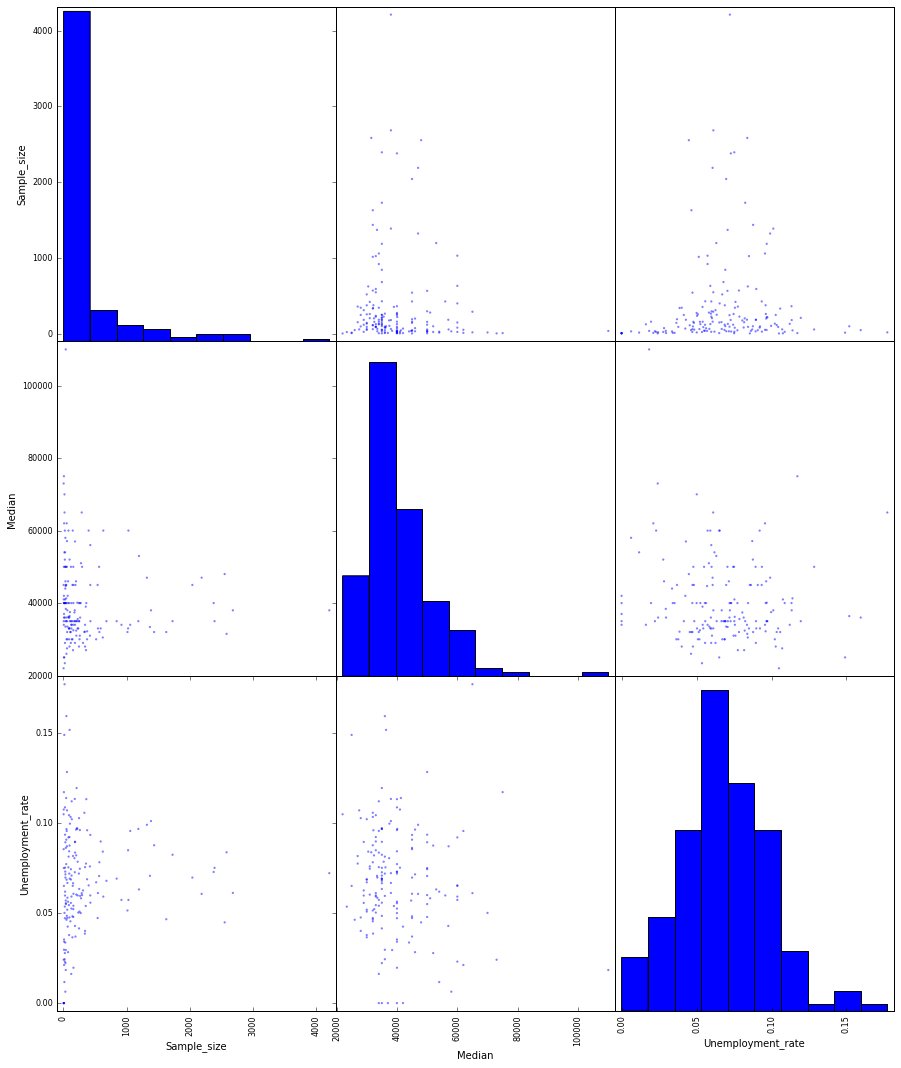

In [116]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median', "Unemployment_rate"]], figsize=(15,18))

### Pandas, Bar Plots

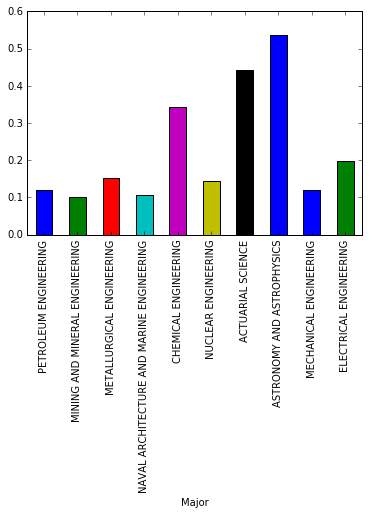

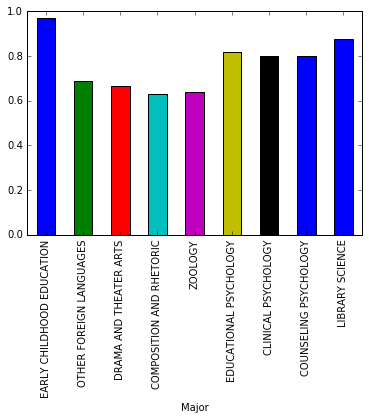

In [117]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

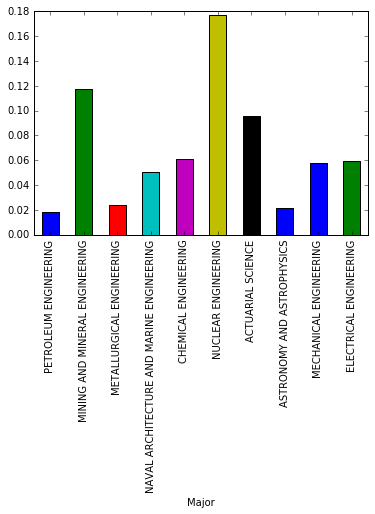

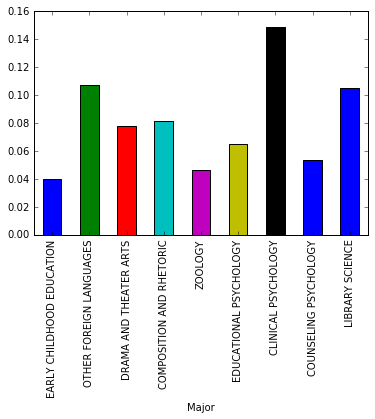

In [118]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)